# Clasificacion de algo

1. Cargamos los datos
2. Analisis de correlaciones  
3. Preparamos los datos
4. Entrenamiento de los modelos
5. Evaluacion de los modelos

# 1. Cargamos los datos

In [1]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargamos el dataset
df = pd.read_excel('Datos Solaz_imputed.xlsx')

In [3]:
df.head()

,Edad,Escolaridad,Número de hijos,Número de nietos,Numero de bisnietos,Numero de medicamentos,Hace cuanto dejo de fumar,Barthel,MMSE,Saturacion de O2,...,Depresión/Disforia,Sintomas de ansiedad,Euforia/Júbilo,Apatía/Indiferencia,Desinhibición,Irritabilidad/Labilidad emocional,Sueño/Trastornos del sueño,Apetito/Trastornos de conducta alimentaria,Inquietud motora,Estado cognitivo
0,10,7.066667,0.0,0.0,0.0,0.0,100.0,45.000000,20.933333,96.000000,...,False,False,False,False,False,False,False,False,False,Cognitivamente Sano
1,46,8.000000,3.0,0.0,0.0,0.0,100.0,82.666667,30.000000,95.133333,...,False,False,False,False,False,False,True,False,False,Cognitivamente Sano
2,93,8.000000,4.0,5.0,1.0,7.0,50.0,83.333333,15.000000,91.000000,...,False,False,False,False,False,False,False,False,False,Otra alteracion mental o del SNC
3,78,4.000000,0.0,0.0,0.0,3.0,100.0,89.000000,25.000000,94.400000,...,False,False,False,False,False,False,False,False,False,Otra alteracion mental o del SNC
4,82,5.000000,1.0,2.0,0.0,4.0,100.0,87.333333,27.000000,95.066667,...,False,False,False,False,False,False,False,False,False,Cognitivamente Sano


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Columns: 120 entries, Edad to Estado cognitivo
dtypes: bool(98), float64(14), int64(1), object(7)
memory usage: 101.5+ KB


In [5]:
df.describe()

,Edad,Escolaridad,Número de hijos,Número de nietos,Numero de bisnietos,Numero de medicamentos,Hace cuanto dejo de fumar,Barthel,MMSE,Saturacion de O2,Frecuencia respiratoria,Presión arterial sistólica,Presión arterial diastólica,Frecuencia cardiaca,Fuerza
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,77.659631,5.587687,3.075989,4.061390,0.450660,5.178364,82.946526,80.413544,20.773263,94.036060,16.872999,125.447493,70.936675,72.594547,5.136675
std,10.895498,2.156207,2.048454,4.913124,1.649617,2.799838,29.043202,18.347230,7.803282,2.453087,1.137324,14.853389,9.772580,10.692953,0.982756
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,80.000000,10.000000,90.000000,40.000000,45.000000,1.000000
25%,73.000000,4.000000,2.000000,0.000000,0.000000,3.000000,79.333333,75.000000,18.000000,93.000000,16.000000,112.833333,60.000000,69.000000,5.000000
50%,79.000000,5.000000,3.000000,3.000000,0.000000,5.000000,100.000000,85.000000,22.133333,94.000000,16.800000,127.000000,70.000000,70.000000,5.000000
75%,84.000000,8.000000,4.000000,5.000000,0.000000,7.000000,100.000000,90.000000,26.500000,95.033333,17.666667,135.000000,80.000000,80.000000,5.000000
max,104.000000,9.000000,14.000000,50.000000,21.000000,14.000000,100.000000,100.000000,30.000000,99.000000,25.000000,175.000000,100.000000,120.000000,7.000000


In [6]:
#print the column names
for col in df.columns:
    print(col)

Edad
Escolaridad
Número de hijos
Número de nietos
Numero de bisnietos
Numero de medicamentos
Hace cuanto dejo de fumar
Barthel
MMSE
Saturacion de O2
Frecuencia respiratoria
Presión arterial sistólica
Presión arterial diastólica
Frecuencia cardiaca
Fuerza
Hombre
Ocupación
Estado civil
Vive solo
Cuidador No Solaz
Cuidador Solaz
HTA
HTA af
Dislipidemia
Dislipidemia af
Diabetes
Diabetes af
Enfermedad ocular
Enfermedad auditiva
Trastornos psiquiatricos
Depresion
Ansiedad
Trastorno afectivo bipolar
Trastorno de personalidad
Otro trastorno psiquiatrico o alteracion mental
Trastornos psiquiatricos af
Enf. neurodegenerativas
Enfermedad de Alzheimer
Degeneracion lobar frontotemporal
Deterioro cognitivo vascular
Enfermedad de Parkinson
Demencia por cuerpos de Lewy
Enfermedad de Huntington
Enf. neurodegenerativas af
Familiares paternos demencia
Familiares maternos demencia
Hermanos demencia
Cáncer
Cáncer af
Enf renal
Enf renal af
Enf cardiaca
Arritmia
Marcapasos
Paciente anticoagulado
Enf cardiaca

In [7]:
#print the percentage of missing values in each column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Edad - 0%
Escolaridad - 0%
Número de hijos - 0%
Número de nietos - 0%
Numero de bisnietos - 0%
Numero de medicamentos - 0%
Hace cuanto dejo de fumar - 0%
Barthel - 0%
MMSE - 0%
Saturacion de O2 - 0%
Frecuencia respiratoria - 0%
Presión arterial sistólica - 0%
Presión arterial diastólica - 0%
Frecuencia cardiaca - 0%
Fuerza - 0%
Hombre - 0%
Ocupación - 0%
Estado civil - 0%
Vive solo - 0%
Cuidador No Solaz - 0%
Cuidador Solaz - 0%
HTA - 0%
HTA af - 0%
Dislipidemia - 0%
Dislipidemia af - 0%
Diabetes - 0%
Diabetes af - 0%
Enfermedad ocular - 0%
Enfermedad auditiva - 0%
Trastornos psiquiatricos - 0%
Depresion - 0%
Ansiedad - 0%
Trastorno afectivo bipolar - 0%
Trastorno de personalidad - 0%
Otro trastorno psiquiatrico o alteracion mental - 0%
Trastornos psiquiatricos af - 0%
Enf. neurodegenerativas - 0%
Enfermedad de Alzheimer - 0%
Degeneracion lobar frontotemporal - 0%
Deterioro cognitivo vascular - 0%
Enfermedad de Parkinson - 0%
Demencia por cuerpos de Lewy - 0%
Enfermedad de Huntington -

# 2. Analisis de correlaciones

## 2.1 Correlaciones con la variable objetivo

In [8]:
#transform object colums to category
for col in df.select_dtypes(include=[np.object]).columns:
    df[col] = df[col].astype('category')

C:\Users\User\AppData\Local\Temp\ipykernel_5172\303974590.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for col in df.select_dtypes(include=[np.object]).columns:


In [9]:
bool_cols = [col for col in df if df[col].nunique() == 2 and df[col].dtype == 'category' or df[col].dtype == 'bool']
category_cols = [col for col in df if df[col].nunique() > 2 and df[col].dtype == 'category']


category_cols.remove('Estado cognitivo')

#Dummies para variables categoricas con mas de 2 clases excepto para la variable objetivo
df_dm = pd.get_dummies(df, columns=category_cols, drop_first=False)

#Dummies para variables categoricas con 2 clases 
df_dm = pd.get_dummies(df_dm, columns=bool_cols, drop_first=True)




In [10]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_dm

scaler = MinMaxScaler()

features = df_scaled.select_dtypes(include=[np.number]).columns

df_scaled[features] = scaler.fit_transform(df_scaled[features])

df_scaled.head()

,Edad,Escolaridad,Número de hijos,Número de nietos,Numero de bisnietos,Numero de medicamentos,Hace cuanto dejo de fumar,Barthel,MMSE,Saturacion de O2,...,Agitación/Agresividad_True,Depresión/Disforia_True,Sintomas de ansiedad_True,Euforia/Júbilo_True,Apatía/Indiferencia_True,Desinhibición_True,Irritabilidad/Labilidad emocional_True,Sueño/Trastornos del sueño_True,Apetito/Trastornos de conducta alimentaria_True,Inquietud motora_True
0,0.000000,0.758333,0.000000,0.00,0.000000,0.000000,1.0,0.421053,0.697778,0.842105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.382979,0.875000,0.214286,0.00,0.000000,0.000000,1.0,0.817544,1.000000,0.796491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.882979,0.875000,0.285714,0.10,0.047619,0.500000,0.5,0.824561,0.500000,0.578947,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.723404,0.375000,0.000000,0.00,0.000000,0.214286,1.0,0.884211,0.833333,0.757895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.765957,0.500000,0.071429,0.04,0.000000,0.285714,1.0,0.866667,0.900000,0.792982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_scaled.columns.tolist()

['Edad',
 'Escolaridad',
 'Número de hijos',
 'Número de nietos',
 'Numero de bisnietos',
 'Numero de medicamentos',
 'Hace cuanto dejo de fumar',
 'Barthel',
 'MMSE',
 'Saturacion de O2',
 'Frecuencia respiratoria',
 'Presión arterial sistólica',
 'Presión arterial diastólica',
 'Frecuencia cardiaca',
 'Fuerza',
 'Estado cognitivo',
 'Ocupación_Ama de casa',
 'Ocupación_Comercio',
 'Ocupación_Construccion',
 'Ocupación_Desempleado',
 'Ocupación_FFAA o policia',
 'Ocupación_Industria',
 'Ocupación_Pensionado(a)',
 'Ocupación_Servicios',
 'Ocupación_Transporte',
 'Estado civil_Casado',
 'Estado civil_Divorciado',
 'Estado civil_Separado',
 'Estado civil_Soltero',
 'Estado civil_Union libre',
 'Estado civil_Viudo',
 'Grupo sanguineo_A+',
 'Grupo sanguineo_A-',
 'Grupo sanguineo_AB+',
 'Grupo sanguineo_B+',
 'Grupo sanguineo_B-',
 'Grupo sanguineo_O+',
 'Grupo sanguineo_O-',
 'Bipedestacion_Con ayuda',
 'Bipedestacion_No',
 'Bipedestacion_Si',
 'Apoyo en talones_Con ayuda',
 'Apoyo en tal

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Creating Features and Target variable
X = df_scaled.drop(columns=['Estado cognitivo'])
Y = df_scaled['Estado cognitivo']

# Ensure the target variable is categorical using LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)


#splitting the data into training and testing data sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3 ,random_state=1, stratify=Y)

#Library for getting mutual info
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info = mutual_info.sort_values(ascending=False)
mutual_info

MMSE                                               0.430540
Alteracion en orientacion tiempo_True              0.189131
Alteracion en habilidades  visuoespaciales_True    0.188662
Alteracion en lenguaje_True                        0.154079
Alteracion en orientacion espacio_True             0.136785
                                                     ...   
Grupo sanguineo_AB+                                0.000000
Extabaquismo_True                                  0.000000
Alcoholismo o abuso de licor_True                  0.000000
Estado civil_Union libre                           0.000000
Edad                                               0.000000
Length: 141, dtype: float64

In [13]:
for col, value in mutual_info.items():
    if value > 0:
        print(f"{col}: {value:.5f}")

MMSE: 0.43054
Alteracion en orientacion tiempo_True: 0.18913
Alteracion en habilidades  visuoespaciales_True: 0.18866
Alteracion en lenguaje_True: 0.15408
Alteracion en orientacion espacio_True: 0.13678
Alteracion en memoria_True: 0.10550
Caídas _True: 0.08415
Enf. neurodegenerativas_True: 0.08151
Enfermedad de Alzheimer_True: 0.07477
Enf tiroidea_True: 0.07128
Alteracion en atencion y calculo_True: 0.07038
Presión arterial diastólica: 0.06642
Ansiedad_True: 0.06285
Agitación/Agresividad_True: 0.05988
Apoyo en talones_No: 0.05809
Ocupación_Industria: 0.05639
Grupo sanguineo_O-: 0.05552
Cirugias ortopedicas_True: 0.05446
Cáncer_True: 0.05431
Hermanos demencia_True: 0.05076
Delirios_True: 0.04844
Otro trastorno psiquiatrico o alteracion mental_True: 0.04757
Enfermedad de Parkinson_True: 0.04706
Bipedestacion_No: 0.04616
Enfermedad auditiva_True: 0.04318
Ocupación_Servicios: 0.04165
Grupo sanguineo_A+: 0.03860
Apoyo en puntas_No: 0.03788
Dislipidemia af_True: 0.03740
Numero de bisnietos: 

In [14]:
Req_Columns = list(mutual_info[mutual_info>0.02].index)
Req_Columns

['MMSE',
 'Alteracion en orientacion tiempo_True',
 'Alteracion en habilidades  visuoespaciales_True',
 'Alteracion en lenguaje_True',
 'Alteracion en orientacion espacio_True',
 'Alteracion en memoria_True',
 'Caídas _True',
 'Enf. neurodegenerativas_True',
 'Enfermedad de Alzheimer_True',
 'Enf tiroidea_True',
 'Alteracion en atencion y calculo_True',
 'Presión arterial diastólica',
 'Ansiedad_True',
 'Agitación/Agresividad_True',
 'Apoyo en talones_No',
 'Ocupación_Industria',
 'Grupo sanguineo_O-',
 'Cirugias ortopedicas_True',
 'Cáncer_True',
 'Hermanos demencia_True',
 'Delirios_True',
 'Otro trastorno psiquiatrico o alteracion mental_True',
 'Enfermedad de Parkinson_True',
 'Bipedestacion_No',
 'Enfermedad auditiva_True',
 'Ocupación_Servicios',
 'Grupo sanguineo_A+',
 'Apoyo en puntas_No',
 'Dislipidemia af_True',
 'Numero de bisnietos',
 'Apetito/Trastornos de conducta alimentaria_True',
 'Ocupación_Transporte',
 'Estado civil_Soltero',
 'Barthel',
 'Tabaquismo activo_True',
 

In [15]:
Req_Columns_clean = [col.split('_')[0] for col in Req_Columns]
Req_Columns_clean = list(set(Req_Columns_clean))
Req_Columns_clean

['Paciente anticoagulado',
 'Apoyo en puntas',
 'Degeneracion lobar frontotemporal',
 'Prension palmar',
 'Alteracion en lenguaje',
 'Cirugias ortopedicas',
 'Enfermedad auditiva',
 'Desinhibición',
 'Euforia/Júbilo',
 'Alteracion en memoria',
 'Enf tiroidea',
 'Alteracion en orientacion espacio',
 'Enfermedad de Parkinson',
 'Agitación/Agresividad',
 'Enf. neurodegenerativas',
 'Alteracion en habilidades  visuoespaciales',
 'Numero de medicamentos',
 'Otro trastorno psiquiatrico o alteracion mental',
 'Caídas ',
 'Ocupación',
 'Enfermedad de Alzheimer',
 'Cáncer',
 'Delirios',
 'Irritabilidad/Labilidad emocional',
 'Grupo sanguineo',
 'Ociqueo',
 'Presión arterial diastólica',
 'Hermanos demencia',
 'Bipedestacion',
 'Enf respiratoria',
 'Enf tiroidea af',
 'Deterioro cognitivo vascular',
 'Presión arterial sistólica',
 'Dislipidemia af',
 'Apoyo en talones',
 'Estado civil',
 'Ansiedad',
 'Tabaquismo activo',
 'Numero de bisnietos',
 'Alteracion en atencion y calculo',
 'Apetito/Tras

## 2.2 Correlaciones entre variables

In [16]:
df_corr = df[Req_Columns_clean + ['Estado cognitivo']]
df_corr.head()

,Paciente anticoagulado,Apoyo en puntas,Degeneracion lobar frontotemporal,Prension palmar,Alteracion en lenguaje,Cirugias ortopedicas,Enfermedad auditiva,Desinhibición,Euforia/Júbilo,Alteracion en memoria,...,Estado civil,Ansiedad,Tabaquismo activo,Numero de bisnietos,Alteracion en atencion y calculo,Apetito/Trastornos de conducta alimentaria,Barthel,Alteracion en orientacion tiempo,MMSE,Estado cognitivo
0,False,No,False,False,True,False,False,False,False,True,...,Soltero,False,False,0.0,True,False,45.000000,True,20.933333,Cognitivamente Sano
1,False,No,False,False,False,False,False,False,False,False,...,Casado,True,False,0.0,False,False,82.666667,False,30.000000,Cognitivamente Sano
2,False,No,False,False,True,False,False,False,False,True,...,Casado,False,False,1.0,True,False,83.333333,True,15.000000,Otra alteracion mental o del SNC
3,False,No,False,False,False,True,False,False,False,False,...,Soltero,False,False,0.0,True,False,89.000000,False,25.000000,Otra alteracion mental o del SNC
4,False,No,False,False,False,True,False,False,False,False,...,Divorciado,False,False,0.0,False,False,87.333333,False,27.000000,Cognitivamente Sano


In [17]:
#labelencoder for target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_corr['Estado cognitivo'] = le.fit_transform(df_corr['Estado cognitivo'])
df_corr.head()

C:\Users\User\AppData\Local\Temp\ipykernel_5172\2458184490.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['Estado cognitivo'] = le.fit_transform(df_corr['Estado cognitivo'])


,Paciente anticoagulado,Apoyo en puntas,Degeneracion lobar frontotemporal,Prension palmar,Alteracion en lenguaje,Cirugias ortopedicas,Enfermedad auditiva,Desinhibición,Euforia/Júbilo,Alteracion en memoria,...,Estado civil,Ansiedad,Tabaquismo activo,Numero de bisnietos,Alteracion en atencion y calculo,Apetito/Trastornos de conducta alimentaria,Barthel,Alteracion en orientacion tiempo,MMSE,Estado cognitivo
0,False,No,False,False,True,False,False,False,False,True,...,Soltero,False,False,0.0,True,False,45.000000,True,20.933333,0
1,False,No,False,False,False,False,False,False,False,False,...,Casado,True,False,0.0,False,False,82.666667,False,30.000000,0
2,False,No,False,False,True,False,False,False,False,True,...,Casado,False,False,1.0,True,False,83.333333,True,15.000000,2
3,False,No,False,False,False,True,False,False,False,False,...,Soltero,False,False,0.0,True,False,89.000000,False,25.000000,2
4,False,No,False,False,False,True,False,False,False,False,...,Divorciado,False,False,0.0,False,False,87.333333,False,27.000000,0


In [18]:
#correlaciones 
corr_lin = df_corr.corr()
corr_lin 

C:\Users\User\AppData\Local\Temp\ipykernel_5172\1370595779.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_lin = df_corr.corr()


,Paciente anticoagulado,Degeneracion lobar frontotemporal,Prension palmar,Alteracion en lenguaje,Cirugias ortopedicas,Enfermedad auditiva,Desinhibición,Euforia/Júbilo,Alteracion en memoria,Enf tiroidea,...,Dislipidemia af,Ansiedad,Tabaquismo activo,Numero de bisnietos,Alteracion en atencion y calculo,Apetito/Trastornos de conducta alimentaria,Barthel,Alteracion en orientacion tiempo,MMSE,Estado cognitivo
Paciente anticoagulado,1.000000,-0.018081,0.058914,0.058327,0.077282,-0.009745,0.078686,0.019554,0.035536,0.041701,...,-0.018081,-0.013369,-0.036453,0.080037,-0.005412,0.072945,-0.111114,-0.009459,-0.025597,-0.019504
Degeneracion lobar frontotemporal,-0.018081,1.000000,0.282521,0.100803,0.046198,-0.030645,0.134020,0.194813,0.111750,-0.046278,...,-0.005305,-0.018081,-0.010696,-0.019924,0.059274,-0.036478,-0.030795,0.058300,-0.147422,-0.017885
Prension palmar,0.058914,0.282521,1.000000,0.131001,0.030382,-0.053362,0.144835,0.097788,0.148382,-0.033885,...,0.282521,-0.031485,-0.018624,-0.009032,0.060038,0.147655,-0.360493,0.058190,-0.233200,-0.031143
Alteracion en lenguaje,0.058327,0.100803,0.131001,1.000000,-0.055086,0.022523,0.142259,0.091543,0.695486,-0.066159,...,0.100803,-0.084291,-0.067437,0.056503,0.383667,0.137864,-0.303067,0.293538,-0.664717,0.142460
Cirugias ortopedicas,0.077282,0.046198,0.030382,-0.055086,1.000000,0.013377,-0.061256,-0.063750,-0.030565,0.037155,...,0.046198,-0.002891,-0.037279,0.001297,0.064596,-0.010089,-0.059226,0.030282,-0.000038,-0.050859
Enfermedad auditiva,-0.009745,-0.030645,-0.053362,0.022523,0.013377,1.000000,0.016722,0.008231,0.064629,0.026203,...,-0.030645,-0.041311,-0.061783,0.082048,-0.019453,0.010507,-0.038608,-0.026348,0.022345,-0.021964
Desinhibición,0.078686,0.134020,0.144835,0.142259,-0.061256,0.016722,1.000000,0.648294,0.148393,-0.063840,...,0.286553,-0.063098,-0.037325,-0.006027,0.026266,0.065907,-0.100027,0.044886,-0.235667,0.005249
Euforia/Júbilo,0.019554,0.194813,0.097788,0.091543,-0.063750,0.008231,0.648294,1.000000,0.112729,-0.048311,...,-0.013170,-0.044888,-0.026553,0.027978,0.024039,0.022342,-0.044653,0.052076,-0.146464,-0.007498
Alteracion en memoria,0.035536,0.111750,0.148382,0.695486,-0.030565,0.064629,0.148393,0.112729,1.000000,0.019131,...,0.111750,-0.087798,-0.055584,0.032942,0.424385,0.062526,-0.270762,0.368006,-0.680572,0.087159
Enf tiroidea,0.041701,-0.046278,-0.033885,-0.066159,0.037155,0.026203,-0.063840,-0.048311,0.019131,1.000000,...,-0.046278,-0.033085,0.068906,0.014430,-0.054444,-0.099835,-0.003057,-0.124685,0.031801,-0.213120


<AxesSubplot: >

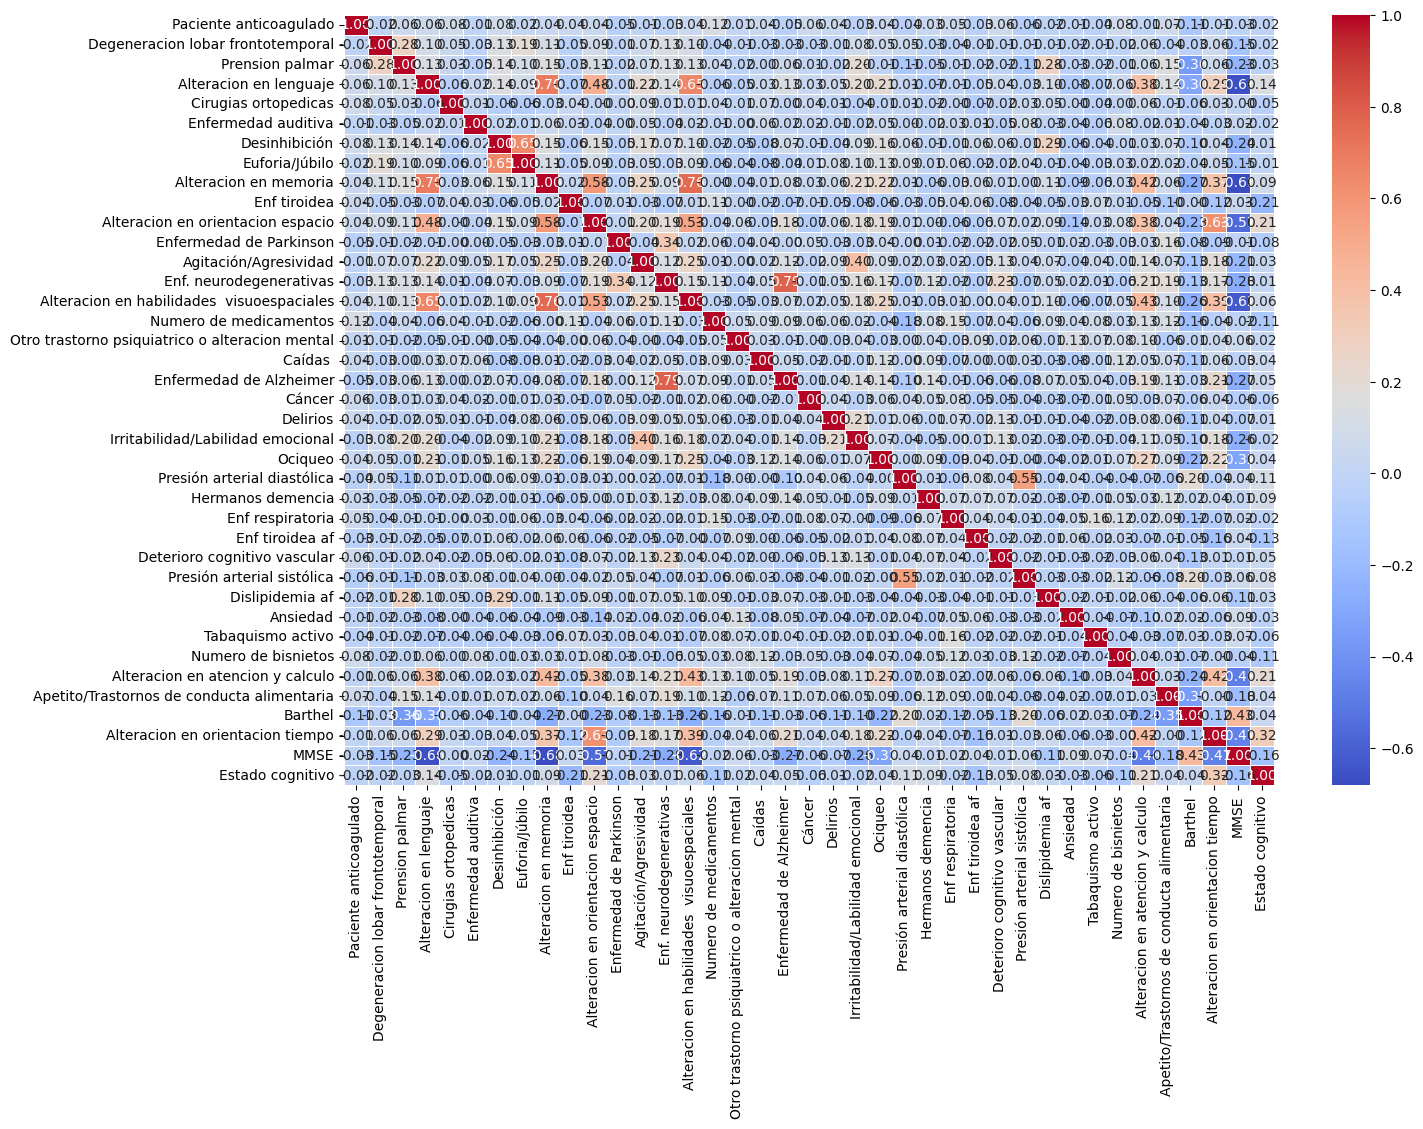

In [19]:
#correlation heatmap of dataset
plt.figure(figsize=(15,10))
sns.heatmap(corr_lin, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

<AxesSubplot: >

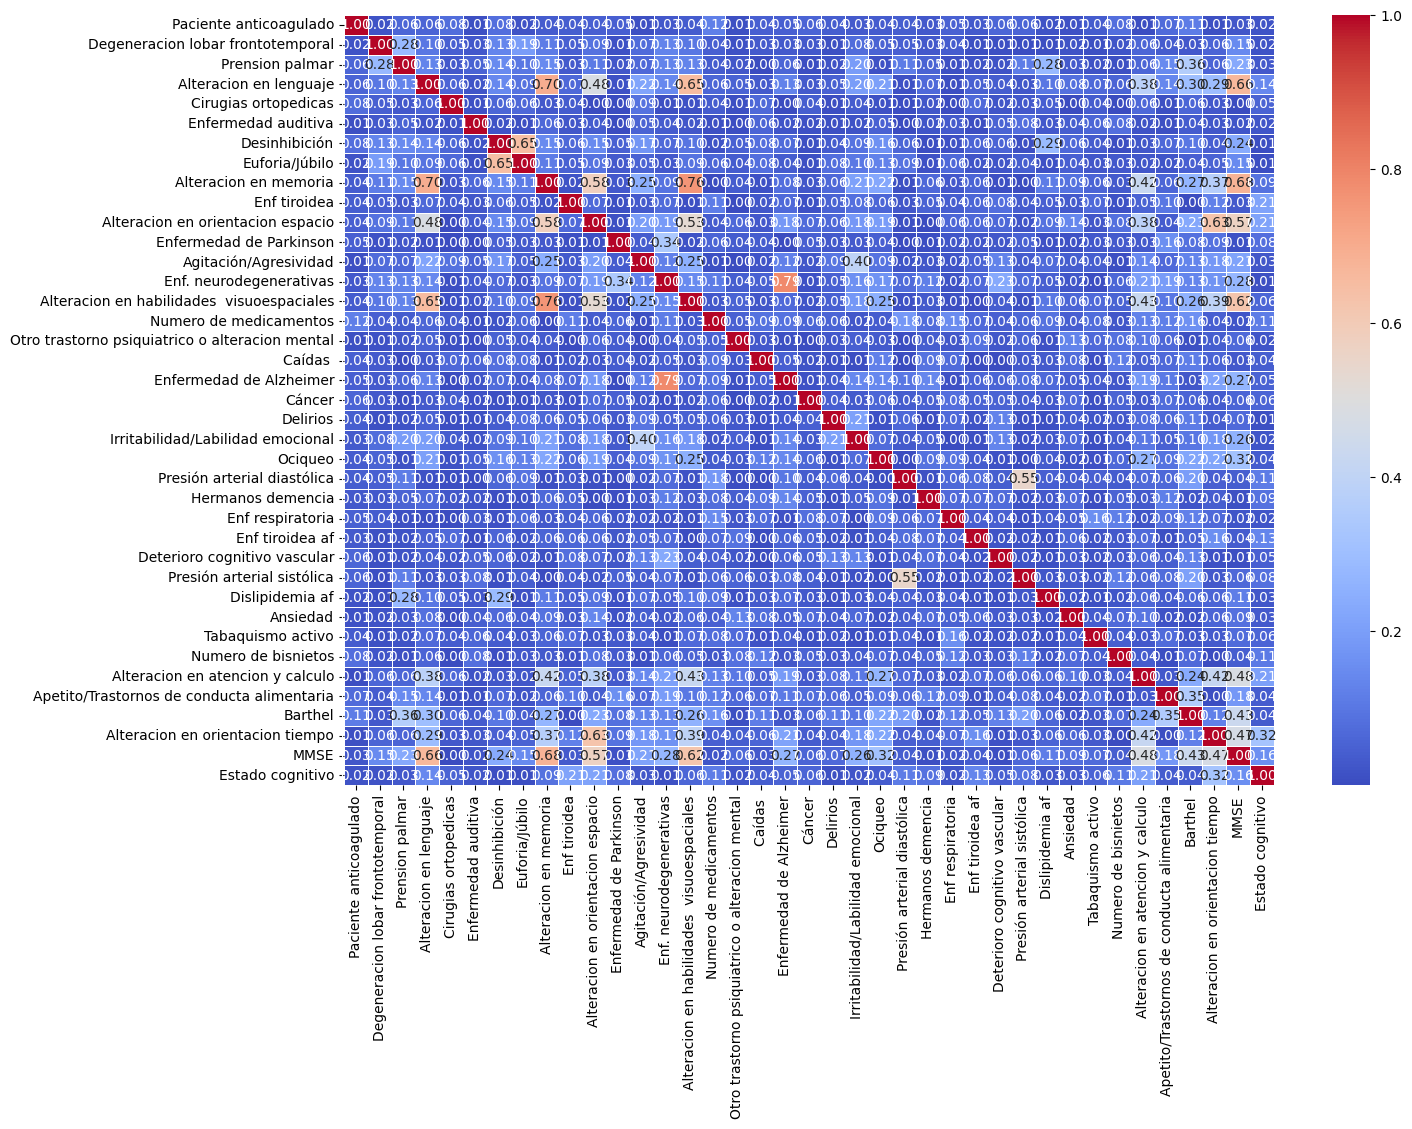

In [20]:
corr_abs = corr_lin.abs()

#plotting the correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_abs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

In [21]:

#Drop the columns and rows which have a lower correlation than 0.1 with the target variable
corr_abs = corr_abs[corr_abs['Estado cognitivo'] > 0.1]

#Variables redundantes
corr_matrix_redundant = corr_abs[corr_abs > 0.8]

#drop the diagonal
corr_matrix_redundant = corr_matrix_redundant[corr_matrix_redundant < 1]

#Drop the columns and rows that are completely null
corr_matrix_redundant.dropna(axis=0, how='all', inplace=True)
corr_matrix_redundant.dropna(axis=1, how='all', inplace=True)

corr_matrix_redundant

""


# 3. Preparamos los datos

## 3.1. Funciones de ayuda

In [22]:
#creamos una funcion para dividir los datos
def split_data(data, features, target, stratify = None):
    from sklearn.model_selection import train_test_split
    X = data[features]
    Y = data[target]
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2 ,random_state=1, stratify=stratify)
    return X_train,X_test,Y_train,Y_test


#Creamos una funcion para balancear los datos
def balance_data(X_train, Y_train):
    
    import pandas as pd
    from sklearn.impute import SimpleImputer
    
    # For X_train
    nan_columns_x = X_train.columns[X_train.isnull().any()].tolist()  # Columns with NaN
    nan_rows_x = X_train[X_train.isnull().any(axis=1)]  # Rows with NaN in any column
    
    # For Y_train
    nan_rows_y = Y_train[Y_train.isnull()]  # Rows with NaN
    
    # For numerical columns
    numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
    num_imputer = SimpleImputer(strategy='mean')
    X_train[numerical_cols] = num_imputer.fit_transform(X_train[numerical_cols])

    # For categorical columns  
    categorical_cols = X_train.select_dtypes(include=['object','category']).columns
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
    
    
    from imblearn.over_sampling import SMOTENC, SMOTE
    
    object_cols = []
    for col in X_train.columns:
        if X_train[col].dtype == "category" or X_train[col].dtype == "object":
            X_train[col] = X_train[col].astype("object")
            object_cols.append(X_train.columns.get_loc(col))
                
                
    smote = SMOTENC(categorical_features=object_cols, random_state=0)
    X_train, Y_train = smote.fit_resample(X_train, Y_train)
    
    return X_train, Y_train

#Creamos una funcion para crear las variables dummies
def create_dummies(X_train,X_test):
    
    # Concatenate the train and test data
    X_full = pd.concat([X_train, X_test])

    bool_cols = [col for col in X_full if X_full[col].nunique() == 2 and X_full[col].dtype == 'object' or X_full[col].dtype == 'bool']
    category_cols = [col for col in X_full if X_full[col].nunique() > 2 and X_full[col].dtype == 'object']


    #Dummies para variables categoricas con mas de 2 clases
    X_full = pd.get_dummies(X_full, columns=category_cols, drop_first=False)

    #Dummies para variables categoricas con 2 clases
    X_full = pd.get_dummies(X_full, columns=bool_cols, drop_first=True)

    # Split the data back into train and test
    X_train = X_full.iloc[:X_train.shape[0], :]
    X_test = X_full.iloc[X_train.shape[0]:, :]
    
    return X_train,X_test

#creamos una funcion para hacer el label encoder
def label_encoder(Y_train,Y_test):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    Y_train = le.fit_transform(Y_train)
    Y_test = le.transform(Y_test)
    return Y_train,Y_test, le



## 3.2. Organizamos los sets de datos

In [23]:
#Cargamos el dataset
df = pd.read_excel('Datos Solaz_imputed.xlsx')

#Dividimos los datos en train y test
X_train,X_rest1,Y_train,Y_rest1 = split_data(df, Req_Columns_clean, 'Estado cognitivo', stratify = Y)

#Balanceo
X_train,Y_train = balance_data(X_train, Y_train)

#Dummies para variables categoricas
X_train,X_rest1 = create_dummies(X_train,X_rest1)

#Label encoder para la variable objetivo
Y_train,Y_rest1,le = label_encoder(Y_train,Y_rest1)

#From the remaining data, split the test data
X_test, X_rest2, y_test, y_rest2 = train_test_split(X_rest1, Y_rest1, test_size=0.6667, random_state=1, stratify=Y_rest1)

# Split remaining into calibration and "new" data
X_calib, X_new, y_calib, y_new = train_test_split (X_rest2, y_rest2, test_size=0.5, random_state=1, stratify=y_rest2)

In [24]:
#print the sizes of the data
print(f"Train data: {X_train.shape}")
print(f"Test data: {X_test.shape}")
print(f"Calibration data: {X_calib.shape}")
print(f"New data: {X_new.shape}")

Train data: (411, 69)
Test data: (25, 69)
Calibration data: (25, 69)
New data: (26, 69)


# 4. Entrenamiento de los modelos

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import catboost as cb

## 4.1. Hiperparametros

In [26]:
#definimos los hiperparametros para cada tipo de modelo

param_grid_tree = { 'criterion': Categorical(['gini', 'entropy']),
                    'max_depth': Integer(2, 500),
                    'min_samples_leaf': Integer(2, 100),
                }

param_grid_knn = {  'n_neighbors': Integer(1, 30),
                    'metric': Categorical(['euclidean', 'minkowski', 'manhattan', 'chebyshev']),
                }

param_grid_nb = { 'var_smoothing': Continuous(1e-9, 1e-1)}


param_grid_mlp = {  'solver': Categorical(['sgd', 'adam', 'lbfgs']),
                    'alpha': Continuous(0.0001, 1.0),
                    'learning_rate': Categorical(['constant','adaptive','invscaling']),
                    'learning_rate_init': Continuous(0.01, 1.0),
                    'momentum': Continuous(0.01, 1.0),
                    'activation': Categorical(['identity', 'logistic', 'tanh', 'relu']),
                    'hidden_layer_sizes': Integer(25, 100)
                }

param_grid_svc = {  'C': Continuous(0.01, 5.0),
                    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
                    'gamma': Categorical(['scale', 'auto'])
                }

param_grid_rf = {   'criterion': Categorical(['gini', 'entropy', 'log_loss']),
                    'max_depth': Integer(10, 100),
                    'min_samples_leaf': Integer(2, 100),
                    'n_estimators': Integer(10, 300),
                    'max_samples': Continuous(0.1, 1)
                }

param_grid_xgb = {  'n_estimators': Integer(10, 300),
                'max_depth': Integer(10, 100),
                'learning_rate': Continuous(0.01, 1.0),
                'subsample': Continuous(0.4, 0.8)
            }

param_grid_cb = {   'iterations': Integer(10, 300),
                    'depth': Integer(2, 10),
                    'learning_rate': Continuous(0.01, 1.0),
                    'l2_leaf_reg': Continuous(0.1, 10.0),
                    'bagging_temperature': Continuous(0.0, 1.0)
                }

## 4.2. Funciones de ayuda

In [27]:
#creamos una funcion para entrenar los modelos utilizando algoritmos geneticos

def train_models(X_train, Y_train, param_grid, estimator):
    
    param_grid = param_grid
    
    evolved_estimator = GASearchCV( estimator = estimator,
                                    cv=10,
                                    scoring= 'balanced_accuracy',
                                    population_size=30,
                                    generations=15,
                                    elitism=True,
                                    crossover_probability=0.4,
                                    mutation_probability=0.6,
                                    param_grid=param_grid,
                                    criteria='max',
                                    n_jobs=-1,
                                    verbose=True)
    
    evolved_estimator.fit(X_train, Y_train)
    
    hiperparametros = evolved_estimator.best_params_
    bestmodel = evolved_estimator.best_estimator_
    
    return hiperparametros, bestmodel


#creamos una funcion para evaluar el modelo
def evaluate_model(X_test, Y_test, model):
    
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix
    
    Y_pred = model.predict(X_test)
    
    cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
    
    #display the confusion matrix
    #disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=encoder.classes_)
    #disp.plot()
    
    epsilon = 1e-9
    
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp/(tp+fn+epsilon)
    specificity = tn/(tn+fp + epsilon)
    balanced_accuracy = (sensitivity+specificity)/2
    f1_score = 2*tp/(2*tp+fp+fn + epsilon)
    precision = tp/(tp+fp + epsilon)
    false_positive_rate = fp/(fp+tn + epsilon)
    false_negative_rate = fn/(fn+tp + epsilon)
    positive_likelihood_ratio = sensitivity/false_positive_rate 
    negative_likelihood_ratio = false_negative_rate/specificity
    diagnostic_odds_ratio = positive_likelihood_ratio/negative_likelihood_ratio
    roc_auc = metrics.roc_auc_score(Y_test, Y_pred, multi_class='ovo')
    
    return {
            'Verdaderos positivos': tp,
            'Verdaderos negativos': tn,
            'Falsos positivos': fp,
            'Falsos negativos': fn,
            'sensitivity': sensitivity,
            'specificity': specificity,
            'balanced_accuracy': balanced_accuracy,
            'f1_score': f1_score,
            'precision': precision,
            'false_positive_rate': false_positive_rate,
            'false_negative_rate': false_negative_rate,
            'positive_likelihood_ratio': positive_likelihood_ratio,
            'negative_likelihood_ratio': negative_likelihood_ratio,
            'diagnostic_odds_ratio': diagnostic_odds_ratio,
            'roc_auc': roc_auc
            }


## 4.3. Entrenamiento normal

### 4.3.1. Arbol de decision

In [28]:
'''#entrenamos el modelo de arbol de decision

print('Entrenando el arbol de decision')
print('--------------------------------------') 

hiperparametros_tree, bestmodel_tree = train_models(X_train, 
                                                    Y_train, 
                                                    param_grid_tree, 
                                                    tree.DecisionTreeClassifier())'''

"#entrenamos el modelo de arbol de decision\n\nprint('Entrenando el arbol de decision')\nprint('--------------------------------------') \n\nhiperparametros_tree, bestmodel_tree = train_models(X_train, \n                                                    Y_train, \n                                                    param_grid_tree, \n                                                    tree.DecisionTreeClassifier())"

### 4.3.2. Normalizacion

In [29]:
#normalizamos los datos de entrenamiento
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
features = X_train.select_dtypes(include=[np.number]).columns
X_train[features] = scaler.fit_transform(X_train[features])


### 4.3.3. KNN

In [30]:
'''#print newline
print('\n')
print('Entrenando el KNN')
print('------------------')
#entremanos el modelo de KNN
hiperparametros_knn, bestmodel_knn = train_models(X_train, 
                                                  Y_train, 
                                                  param_grid_knn, 
                                                  KNeighborsClassifier())'''

"#print newline\nprint('\n')\nprint('Entrenando el KNN')\nprint('------------------')\n#entremanos el modelo de KNN\nhiperparametros_knn, bestmodel_knn = train_models(X_train, \n                                                  Y_train, \n                                                  param_grid_knn, \n                                                  KNeighborsClassifier())"

### 4.3.4. Naive Bayes

In [31]:
'''print('\n')
print('Entrenando el Naive Bayes')
print('-------------------------')
#entrenamos el modelo de Naive Bayes
hiperparametros_nb, bestmodel_nb = train_models(X_train, 
                                                Y_train, 
                                                param_grid_nb, 
                                                GaussianNB())
print('\n')'''

"print('\n')\nprint('Entrenando el Naive Bayes')\nprint('-------------------------')\n#entrenamos el modelo de Naive Bayes\nhiperparametros_nb, bestmodel_nb = train_models(X_train, \n                                                Y_train, \n                                                param_grid_nb, \n                                                GaussianNB())\nprint('\n')"

### 4.3.5. Neural Network

In [32]:
'''
print('\n')
print('Entrenando la red neuronal')
print('--------------------------')
#entrenamos el modelo de MLP
hiperparametros_mlp, bestmodel_mlp = train_models(X_train, 
                                                  Y_train, 
                                                  param_grid_mlp, 
                                                  MLPClassifier())'''

"\nprint('\n')\nprint('Entrenando la red neuronal')\nprint('--------------------------')\n#entrenamos el modelo de MLP\nhiperparametros_mlp, bestmodel_mlp = train_models(X_train, \n                                                  Y_train, \n                                                  param_grid_mlp, \n                                                  MLPClassifier())"

### 4.3.6. SVC

In [33]:
'''
print('\n')
print('Entrenando el SVC')
print('-----------------')
#entrenamos el modelo de SVC
hiperparametros_svc, bestmodel_svc = train_models(X_train, 
                                                  Y_train, 
                                                  param_grid_svc, 
                                                  SVC())
print('\n')'''

"\nprint('\n')\nprint('Entrenando el SVC')\nprint('-----------------')\n#entrenamos el modelo de SVC\nhiperparametros_svc, bestmodel_svc = train_models(X_train, \n                                                  Y_train, \n                                                  param_grid_svc, \n                                                  SVC())\nprint('\n')"

### 4.3.7. Random Forest

In [34]:
'''
print('\n')
print('Entrenando el Random Forest')
print('---------------------------')
#entrenamos el modelo de Random Forest
hiperparametros_rf, bestmodel_rf = train_models(X_train, 
                                                Y_train, 
                                                param_grid_rf, 
                                                RandomForestClassifier())'''

"\nprint('\n')\nprint('Entrenando el Random Forest')\nprint('---------------------------')\n#entrenamos el modelo de Random Forest\nhiperparametros_rf, bestmodel_rf = train_models(X_train, \n                                                Y_train, \n                                                param_grid_rf, \n                                                RandomForestClassifier())"

### 4.3.8. XGBoost

In [35]:
print('\n')
print('Entrenando el XGBoost')
print('---------------------')
#entrenamos el modelo de XGBoost
hiperparametros_xgb, bestmodel_xgb = train_models(X_train, 
                                                  Y_train, 
                                                  param_grid_xgb, 
                                                  xgb.XGBClassifier())



Entrenando el XGBoost
---------------------
gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	30    	0.76047	0.0130885  	0.784066   	0.728755   
1  	60    	0.770024	0.00998713 	0.782051   	0.73663    
2  	60    	0.776294	0.00738585 	0.788828   	0.760806   
3  	60    	0.780775	0.00448263 	0.788828   	0.771978   
4  	60    	0.78243 	0.00384904 	0.788828   	0.772344   
5  	60    	0.784988	0.00329212 	0.791758   	0.779853   
6  	60    	0.786245	0.00276848 	0.788828   	0.781685   
7  	60    	0.787552	0.00169615 	0.789194   	0.781868   
8  	60    	0.787949	0.00245011 	0.789011   	0.777106   
9  	60    	0.788578	0.00132788 	0.789194   	0.781685   
10 	60    	0.789048	0.000523182	0.791758   	0.788828   
11 	60    	0.789011	0.000675425	0.791758   	0.78663    
12 	60    	0.788913	0.000841606	0.789194   	0.784432   
13 	60    	0.788907	0.000905539	0.789194   	0.784066   
14 	60    	0.788938	0.000909134	0.789194   	0.784066   
15 	60    	0.78931 	0.000610165	0.791575   	0.789011   


### 4.3.9. CatBoost

In [36]:
'''print('\n')
print('Entrenando el CatBoost')
print('----------------------')
#entrenamos el modelo de CatBoost
hiperparametros_cb, bestmodel_cb = train_models(X_train,
                                                Y_train,
                                                param_grid_cb,
                                                cb.CatBoostClassifier(verbose=0))'''

"print('\n')\nprint('Entrenando el CatBoost')\nprint('----------------------')\n#entrenamos el modelo de CatBoost\nhiperparametros_cb, bestmodel_cb = train_models(X_train,\n                                                Y_train,\n                                                param_grid_cb,\n                                                cb.CatBoostClassifier(verbose=0))"

### 4.3.10. Stacking

In [37]:
'''from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

print('\n')
print('Entrenando el modelo de stacking')
print('---------------------------------')
#Entrenamos el modelo de stacking
estimators = [ ('tree', bestmodel_tree), ('knn', bestmodel_knn),('nb', bestmodel_nb),
                ('mlp', bestmodel_mlp),('svc', bestmodel_svc),('rf', bestmodel_rf),('xgb', bestmodel_xgb)]

#increase the number of iterations of the mlp
bestmodel_mlp.set_params(max_iter=1000)

stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression( max_iter=1000 ))


from sklearn.model_selection import cross_validate
scores = cross_validate(stacking, X_train, Y_train, cv=10, scoring= 'balanced_accuracy', return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

#Modelo Final con todos los datos
stacking.fit(X_train, Y_train) #70%
'''

"from sklearn.ensemble import StackingClassifier\nfrom sklearn.linear_model import LogisticRegression\n\nprint('\n')\nprint('Entrenando el modelo de stacking')\nprint('---------------------------------')\n#Entrenamos el modelo de stacking\nestimators = [ ('tree', bestmodel_tree), ('knn', bestmodel_knn),('nb', bestmodel_nb),\n                ('mlp', bestmodel_mlp),('svc', bestmodel_svc),('rf', bestmodel_rf),('xgb', bestmodel_xgb)]\n\n#increase the number of iterations of the mlp\nbestmodel_mlp.set_params(max_iter=1000)\n\nstacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression( max_iter=1000 ))\n\n\nfrom sklearn.model_selection import cross_validate\nscores = cross_validate(stacking, X_train, Y_train, cv=10, scoring= 'balanced_accuracy', return_train_score=True, return_estimator=False)\nscores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe\n\n#Modelo Final con todos los datos\nstacking.fit(X_train, Y_train) #70%\n"

## 4.4. Conformal Prediction

In [38]:
from mapie.classification import MapieClassifier
from mapie.metrics import classification_coverage_score
from mapie.metrics import classification_mean_width_score

In [39]:
mapie_score = MapieClassifier(bestmodel_xgb, cv='prefit', method='score')
mapie_score.fit(X_calib, y_calib)
y_pred, y_set = mapie_score.predict(X_new, alpha=0.1)
y_set = np.squeeze(y_set)

In [40]:
cov = classification_coverage_score(y_new, y_set)
setsize = classification_mean_width_score(y_set)
print('Coverage: {:.2%}'.format(cov))
print("Avg. set size: {:.2f}".format(setsize))

Coverage: 84.62%
Avg. set size: 2.38


In [41]:
def class_wise_performance(y_new, y_set, classes):
    df = pd.DataFrame()
    # Loop through the classes
    for i in range(len(classes)):
        # Calculate the coverage and set size for the current class
        ynew = y_new[y_new == i]
        yscore = y_set[y_new == i]
        cov = classification_coverage_score(ynew, yscore)
        size = classification_mean_width_score(yscore)
        # Create a new dataframe with the calculated values
        temp_df = pd.DataFrame({"class": [classes[i]],
                                "coverage": [cov],
                                "avg. set size": [size]
                                }, index=[i])
        # Concatenate the new dataframe with the existing one
        df = pd.concat([df, temp_df])
    return df

In [42]:
print(class_wise_performance(y_new, y_set, le.classes_))

                              class  coverage  avg. set size
0               Cognitivamente Sano       1.0       2.333333
1                          Demencia       0.5       2.500000
2  Otra alteracion mental o del SNC       1.0       2.333333


In [43]:
# For the randomized option, the classifier draws random numbers
# So to make the code reproducible, we have to set the random_state
mapie_score = MapieClassifier(bestmodel_xgb, cv="prefit",method="cumulated_score",random_state=1)
mapie_score.fit(X_calib, y_calib)

MapieClassifier(cv='prefit',
                estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None, device=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=None, grow_policy=None,
                                        importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=0.06705973516414346,
                                        max_bin=None, max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=90,
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=130,
                                        n_jobs=None, num_parallel_tree=None,
                                        objective='multi:softprob', ...),
                method='cumulated_score', random_state=1)

In [44]:
y_pred, y_set = mapie_score.predict(X_new, alpha=0.1,include_last_label=True)
y_set = np.squeeze(y_set)

In [45]:
cov = classification_coverage_score(y_new, y_set)
setsize = classification_mean_width_score(y_set)
print('Coverage: {:.2%}'.format(cov))
print("Avg. set size: {:.2f}".format(setsize))
print(class_wise_performance(y_new, y_set, le.classes_))

Coverage: 100.00%
Avg. set size: 3.00
                              class  coverage  avg. set size
0               Cognitivamente Sano       1.0            3.0
1                          Demencia       1.0            3.0
2  Otra alteracion mental o del SNC       1.0            3.0


In [46]:
mapie_score = MapieClassifier(bestmodel_xgb, cv="prefit", method="top_k")
mapie_score.fit(X_calib, y_calib)
y_pred, y_set = mapie_score.predict(X_new, alpha=0.1)
y_set = np.squeeze(y_set)
cov = classification_coverage_score(y_new, y_set)
setsize = classification_mean_width_score(y_set)
print('Coverage: {:.2%}'.format(cov))
print("Avg. set size: {:.2f}".format(setsize))
print(class_wise_performance(y_new, y_set, le.classes_))

Coverage: 100.00%
Avg. set size: 3.00
                              class  coverage  avg. set size
0               Cognitivamente Sano       1.0            3.0
1                          Demencia       1.0            3.0
2  Otra alteracion mental o del SNC       1.0            3.0


In [49]:
mapie_score = MapieClassifier(bestmodel_xgb, cv="prefit", method="raps")
mapie_score.fit(X_calib, y_calib, size_raps=0.2)
y_pred, y_set = mapie_score.predict(X_new, alpha=0.2, include_last_label="randomized")
y_set = np.squeeze(y_set)
cov = classification_coverage_score(y_new, y_set)
setsize = classification_mean_width_score(y_set)
print('Coverage: {:.2%}'.format(cov))
print("Avg. set size: {:.2f}".format(setsize))
print(class_wise_performance(y_new, y_set, le.classes_))

Coverage: 80.77%
Avg. set size: 2.35
                              class  coverage  avg. set size
0               Cognitivamente Sano     1.000       2.333333
1                          Demencia     0.375       2.375000
2  Otra alteracion mental o del SNC     1.000       2.333333


# 5. Evaluacion de los modelos

In [116]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
print('Evaluacion del arbol de decision\n')
Y_pred = bestmodel_tree.predict(X_test)
    
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)

disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= le.classes_)
disp.plot()

tree_results = evaluate_model(X_test, Y_test, bestmodel_tree)

for key, value in tree_results.items():
    print(f"{key}: {value:.5f}")

In [51]:
#Normalizamos los datos de evaluacion
scaler = MinMaxScaler()
features = X_rest1.select_dtypes(include=[np.number]).columns
X_rest1[features] = scaler.fit_transform(X_rest1[features])

In [ ]:

print('Evaluacion del knn\n')
Y_pred = bestmodel_knn.predict(X_test)
    
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)

disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= le.classes_)
disp.plot()

knn_results = evaluate_model(X_test, Y_test, bestmodel_knn)

for key, value in tree_results.items():
    print(f"{key}: {value:.5f}")

In [ ]:
#Evaluamos la red neuronal

print('Evaluacion de la red neuronal\n')

Y_pred = bestmodel_mlp.predict(X_test)

cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)

disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= le.classes_)

disp.plot()

mlp_results = evaluate_model(X_test, Y_test, bestmodel_mlp)

for key, value in mlp_results.items():
    print(f"{key}: {value:.5f}")

In [ ]:
 #Evaluamos el modelo de SVC

print('Evaluacion del SVC\n')

Y_pred = bestmodel_svc.predict(X_test)

cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)

disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= le.classes_)

disp.plot()

svc_results = evaluate_model(X_test, Y_test, bestmodel_svc)

for key, value in svc_results.items():
    print(f"{key}: {value:.5f}")

In [ ]:
 #Evaluamos el modelo de Random Forest

print('Evaluacion del Random Forest\n')

Y_pred = bestmodel_rf.predict(X_test)

cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)

disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= le.classes_)

disp.plot()

rf_results = evaluate_model(X_test, Y_test, bestmodel_rf)

for key, value in rf_results.items():
    print(f"{key}: {value:.5f}")

In [ ]:
# Se imprimen la importancia de las características
print('Importancia de las características')
for i, j in sorted(zip(X_train.columns, bestmodel_rf.feature_importances_)):
    print(i, j)

In [56]:
from sklearn import metrics

Evaluacion del XGBoost

Accuracy of the model: 0.40789473684210525


ValueError: too many values to unpack (expected 4)

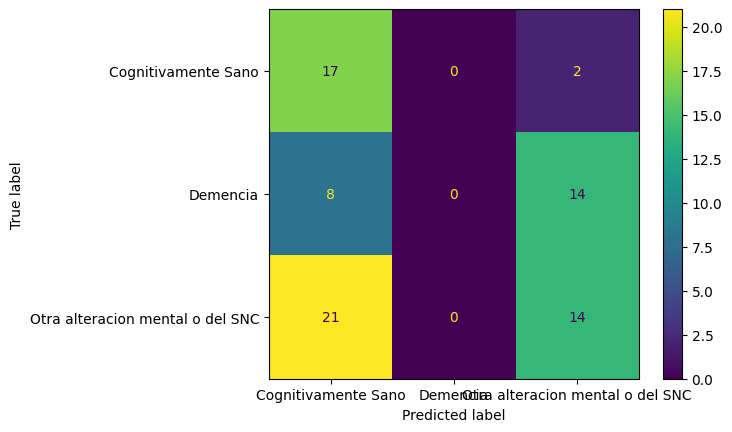

In [57]:
 #Evaluamos el modelo de XGBoost

print('Evaluacion del XGBoost\n')

Y_pred = bestmodel_xgb.predict(X_rest1)

#print the accuracy of the model
print('Accuracy of the model:', bestmodel_xgb.score(X_rest1, Y_rest1))

cm=metrics.confusion_matrix(y_true=Y_rest1, y_pred=Y_pred)

disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= le.classes_)

disp.plot()

xgb_results = evaluate_model(X_rest1, Y_rest1, bestmodel_xgb)

for key, value in xgb_results.items():
    print(f"{key}: {value:.5f}")

In [ ]:
 #Evaluamos el modelo de stacking

print('Evaluacion del modelo de stacking\n')

Y_pred = stacking.predict(X_test)

cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)

disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= le.classes_)

disp.plot()

stacking_results = evaluate_model(X_test, Y_test, stacking)

for key, value in stacking_results.items():
    print(f"{key}: {value:.5f}")

# 6. Entrenamos el mejor modelo con todos los datos

## 6.1. Preparamos todos los datos

In [ ]:
 #labelencoder para la variable objetivo
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df["Target"]=labelencoder.fit_transform(df["Target"])

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
X = df[Req_Columns_clean] #Variables predictoras
Y = df['Target'] #Variable objetivo

In [ ]:
X.info()

In [ ]:
object_cols = []
for col in X.columns:
    if X[col].dtype == "category":
        X[col] = X[col].astype("object")
        object_cols.append(X.columns.get_loc(col))

In [ ]:
#Balanceo de los datos
X, Y = balance_data(X, Y)

In [ ]:
#create a list of the numeric columns
numeric_features = list(X.select_dtypes(include=[np.number]).columns)
print(numeric_features)

#create a list of the categorical columns
categorical_features = list(X.select_dtypes(include=[np.object]).columns)
print(categorical_features)

In [ ]:
# Crear el preprocesamiento de columnas
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(categories='auto', drop='if_binary', sparse=False, handle_unknown='ignore'), categorical_features)
    ])
preprocessor

In [ ]:
X_processed= preprocessor.fit_transform(X)

## 6.2. Entrenamos el modelo

In [ ]:
bestmodel_ALGUNMODELO.fit(X_processed,Y)

## 6.3. Guardamos el modelo

In [ ]:
 # Crea el pipeline con el escalado, codificación y modelo

from sklearn.pipeline import Pipeline


pipeline_model = Pipeline([
    ('preprocessor', preprocessor),  # Aplica el preprocesamiento
    ('model', bestmodel_ALGUNMODELO)  # Mejor modelo
])
pipeline_model

In [ ]:
#Se guarda el pipeline y el labelencoder
import pickle

filename = 'pipeline_modelo.pkl'
pickle.dump([pipeline_model,labelencoder], open(filename, 'wb'))